# 목차

* 프로젝트 1: 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

* 프로젝트 2: 날씨 좋은 월요일 오후 3시, 자전거 타는 사람은 몇 명?

* Referernce

* 회고

--------------------

## **루브릭 평가 기준** 

1. 프로젝트 1의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?  
MSE 손실함수값 3000 이하를 달성

2. 프로젝트 2의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?  
RMSE 값 150 이하를 달성

3. 시각화 요구사항이 정확하게 이루어졌는가?  
각 프로젝트 진행 과정에서 요구하고 있는 데이터개수 시각화 및 예측결과 시각화를 모두 진행하였다.

# Diabetes Regression

In [ ]:
# 필요한 라이브러리 임포팅
# 필요한 데이터 가져오기

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

diabetes = load_diabetes()
print(dir(diabetes))

print(diabetes.data)
print(diabetes.target[0:10])
print(diabetes.DESCR)


['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characterist

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [ ]:
# 데이터 분류하기

df_x = diabetes.data
df_y = diabetes.target

X = df_x
y = df_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## 모델과 함수들

In [ ]:
# 데이터 컬럼 수에 맞게 모델함수

W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [ ]:
# 손실함수, MSE

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [ ]:
# 기울기 계산 (편미분)

def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

## 학습 시작

In [ ]:
# 학습률 (하이퍼 파라미터)
# 일반적인 값

LEARNING_RATE = 0.001

In [ ]:
# 손실함수 보기

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 4781.9451
Iteration 200 : Loss 3730.8208
Iteration 300 : Loss 3428.2235
Iteration 400 : Loss 3265.4753
Iteration 500 : Loss 3163.7069
Iteration 600 : Loss 3095.3801
Iteration 700 : Loss 3047.8326
Iteration 800 : Loss 3014.0992
Iteration 900 : Loss 2989.8731
Iteration 1000 : Loss 2972.3142


### 다양한 하이퍼 마라미터 시험

In [ ]:
# 학습률 하이퍼 마라미터 조정(1)

W = np.random.rand(10)
b = np.random.rand()

LEARNING_RATE = 0.1

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 2971.2758
Iteration 200 : Loss 2924.3975
Iteration 300 : Loss 2920.4751
Iteration 400 : Loss 2919.4028
Iteration 500 : Loss 2918.6711
Iteration 600 : Loss 2918.0152
Iteration 700 : Loss 2917.3946
Iteration 800 : Loss 2916.8004
Iteration 900 : Loss 2916.2291
Iteration 1000 : Loss 2915.6784


In [ ]:
# 학습률 하이퍼 마라미터 조정(2)

W = np.random.rand(10)
b = np.random.rand()

LEARNING_RATE = 0.9

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 2916.2200
Iteration 200 : Loss 2911.8577
Iteration 300 : Loss 2908.5236
Iteration 400 : Loss 2905.9425
Iteration 500 : Loss 2903.9409
Iteration 600 : Loss 2902.3883
Iteration 700 : Loss 2901.1841
Iteration 800 : Loss 2900.2500
Iteration 900 : Loss 2899.5255
Iteration 1000 : Loss 2898.9635


In [ ]:
# 학습률 하이퍼 마라미터 조정(3)

W = np.random.rand(10)
b = np.random.rand()

LEARNING_RATE = 1

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 32950.5308
Iteration 200 : Loss 41664.2722
Iteration 300 : Loss 52909.9168
Iteration 400 : Loss 67421.7451
Iteration 500 : Loss 86147.3894
Iteration 600 : Loss 110309.6719
Iteration 700 : Loss 141486.4548
Iteration 800 : Loss 181713.6774
Iteration 900 : Loss 233618.3096
Iteration 1000 : Loss 300589.9012


In [ ]:
# 학습률 하이퍼 마라미터 조정(4)

W = np.random.rand(10)
b = np.random.rand()

LEARNING_RATE = 0.995

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 6988.6432
Iteration 200 : Loss 3616.0742
Iteration 300 : Loss 3029.6596
Iteration 400 : Loss 2926.1535
Iteration 500 : Loss 2906.7254
Iteration 600 : Loss 2902.2209
Iteration 700 : Loss 2900.5791
Iteration 800 : Loss 2899.6439
Iteration 900 : Loss 2898.9904
Iteration 1000 : Loss 2898.5061


### 학습 결과

In [ ]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2786.23347988466

In [ ]:
# 학습결과

W,b

(array([  32.82682805, -273.92659251,  503.01184632,  368.82107926,
        -628.61409918,  350.92873057,   15.43163825,  135.0488733 ,
         672.0235822 ,   80.04649716]), 154.2434538137773)

In [ ]:
# 테스트 결과

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2786.23347988466

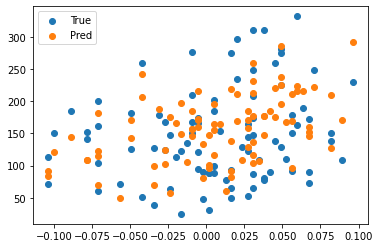

In [ ]:
# 결과 시각화

plt.scatter(X_test[:, 0], y_test, label = "True")
plt.scatter(X_test[:, 0], prediction, label = "Pred")
# plt.legend(['y_test', 'prediction'],loc='best') # 범례, loc 없으면 기본값 best
plt.legend()
plt.show()

## 사이킷런 내장 모델과 비교

In [ ]:
# 사이킷런과 비교하기
# 모델 준비

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
# 학습

model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

array([172.6026195 , 176.28148119, 104.69585481, 123.72910575,
       125.12878964, 175.52777643, 221.40111622, 160.84217484,
       216.01723864, 188.23640164,  95.28169994, 238.58023188,
       223.41367966,  69.82514443, 105.76126405,  55.78164153,
       116.03897361, 146.99490029, 178.51895098, 147.16712575,
       110.60322975, 156.88163267,  82.29902838, 185.57040119,
       145.62898108, 165.09134886, 291.17713684, 242.86947318,
       211.9319605 , 287.46059301, 196.59189228, 127.43915807,
       209.83861506, 183.15819322, 150.20566019, 114.49393354,
       195.96237776, 213.02842684,  98.99933821,  91.55444562,
       225.41194118, 103.49376254, 133.7647088 , 160.23455309,
       137.48223777, 141.62190256, 157.64046084,  90.51687093,
       173.31970041, 232.56300928, 165.0907746 , 147.67290485,
       169.4460534 , 211.64082524, 152.86951042, 108.87126579,
       122.67574881, 171.54413876, 170.1748932 , 207.48393919,
       219.33977709, 164.91846473, 179.5982609 , 109.11

In [ ]:
# 평가

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

2787.6715824467237

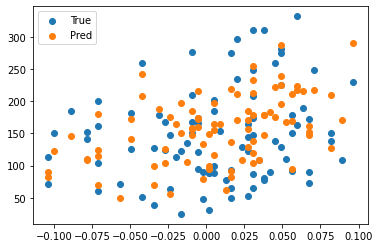

In [ ]:
# 시각화

plt.scatter(X_test[:, 0], y_test, label="True")
plt.scatter(X_test[:, 0], predictions, label="Pred")
plt.legend()
plt.show()

## 프로젝트 결과 및 토의

이 프로젝트에서 나는 당뇨병 수치를 예측하기 위해서 선형회귀 모델을 사용하였다. 선형회귀 모델은 feature data와 target데이터의 관계를 입력값에 가중치를 계산하여 관계를 알아내는 모델이다. 이를 위해 손실함수의 기울기를 통해 경사하강법을 이용하여 가장 손실함수값이 적도록 만들어야한다.

이 과정에서 가장 중요한 것은 적절한 하이퍼 파라미터를 적용하는 것이다. 여기선 학습률이 하이퍼 파라미터인데 너무 큰 값을 사용하면 발산해버리고, 너무 작은 값을 사용하면 학습 속도가 더디다. 따라서 다양한 값을 써보면서 어떤 값이 최적의 값인지 확인해야한다. 이를 위해 학습횟수는 1000회로 동일하게 두고 여러 개의 학습률 값을 바꿔가며 시도해보았다.

가장 적절한 하이퍼 파라미터를 찾기 위한 방법들이 여럿 있는데 나는 10배씩 값을 바꿔가며 손실함수의 변화를 살펴보기로 했다. 0.001부터 시작해서 값을 늘리다가 0.1에서 1로 넘어가는 순간 손실함수가 발산한다는 것을 확인했으며 학습률을 천천히 조정해 손실함수가 작아지지 않고 커지는 지점을 찾아내어 그 직전의 값을 적용했다. 그리고 이렇게 얻은 하이퍼 파라미터를 사용한 결과는 사이킷런의 내장 모델과 유사한 결과를 보여주었다.

# Bikes Regression

## 데이터 가져오기

In [ ]:
from os.path import join
import pandas as pd

data_dir = '/content/drive/MyDrive/아이펠 데이터/bike-sharing'

train_data_path = join(data_dir, 'train (1).csv')
sub_data_path = join(data_dir, 'sampleSubmission.csv')
test_data_path = join(data_dir, 'test (1).csv')


data = pd.read_csv(train_data_path)
sub = pd.read_csv(sub_data_path)
test = pd.read_csv(test_data_path)

print(dir(data))
print('train data dim : {}'.format(data.shape))
print('test data dim : {}'.format(test.shape))

data.head()

['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmatmul__', '__rmod__', '__rmul

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [ ]:
data['datetime'] = pd.to_datetime(data['datetime'])

data['datetime'].dt.year 
data['datetime'].dt.month
data['datetime'].dt.day 
data['datetime'].dt.hour
data['datetime'].dt.minute 
data['datetime'].dt.second

data.insert(0, 'year', data['datetime'].dt.year)
data.insert(1, 'month', data['datetime'].dt.month)
data.insert(2, 'day', data['datetime'].dt.day)
data.insert(3, 'hour', data['datetime'].dt.hour)
data.insert(4, 'minute', data['datetime'].dt.minute)
data.insert(5, 'second', data['datetime'].dt.second)

del data['datetime']

data.tail()

,year,month,day,hour,minute,second,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012,12,19,19,0,0,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012,12,19,20,0,0,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012,12,19,21,0,0,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012,12,19,22,0,0,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012,12,19,23,0,0,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


## year, month, day, hour, minute, second 데이터 개수 시각화하기

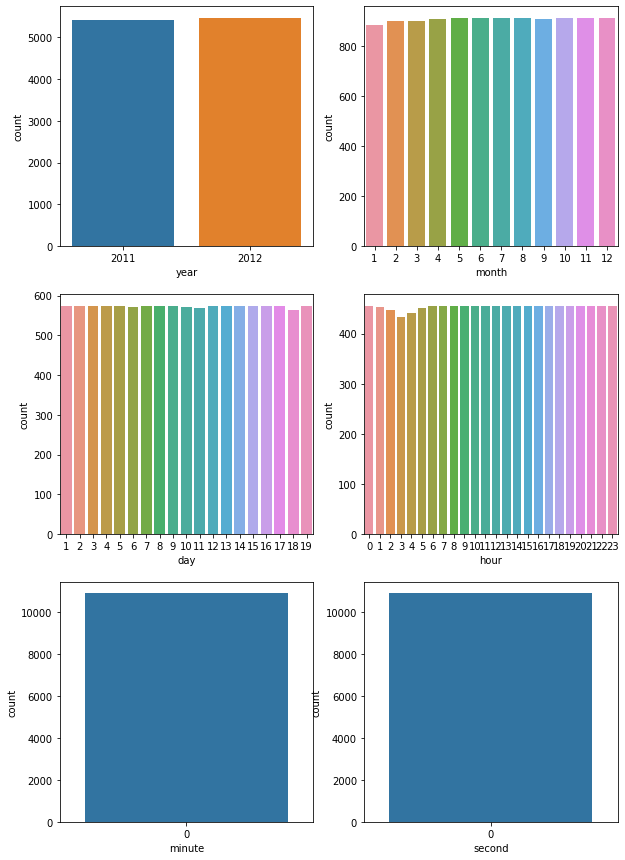

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,15))

year = fig.add_subplot(3,2,1)
month = fig.add_subplot(3,2,2)
day = fig.add_subplot(3,2,3)
hour = fig.add_subplot(3,2,4)
minute = fig.add_subplot(3,2,5)
second = fig.add_subplot(3,2,6)

Year = sns.countplot(x="year",data=data, ax=year)
Month = sns.countplot(x="month",data=data, ax=month)
Day = sns.countplot(x="day",data=data, ax=day)
Hour = sns.countplot(x="hour",data=data, ax=hour)
Minute = sns.countplot(x="minute",data=data, ax=minute)
Second = sns.countplot(x="second",data=data, ax=second)

## X, y 컬럼 선택 및 train/test 데이터 분리

In [ ]:
# feature data로 사용하기에 부적절한 컬럼 제외
# target data인 count를 y로 사용

features = ['year','month','day','hour','season','holiday','workingday','weather','temp', 'atemp', 'humidity', 'windspeed']
target = 'count'

X = data[features]
y = data[target]

X.head()

,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011,1,1,0,1,0,0,1,9.84,14.395,81,0.0
1,2011,1,1,1,1,0,0,1,9.02,13.635,80,0.0
2,2011,1,1,2,1,0,0,1,9.02,13.635,80,0.0
3,2011,1,1,3,1,0,0,1,9.84,14.395,75,0.0
4,2011,1,1,4,1,0,0,1,9.84,14.395,75,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, test_size=0.2)

## LinearRegression 모델 학습

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

## 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [ ]:

predictions = model.predict(X_test)
predictions

array([258.89315324, 297.49769696, 295.99833254, ..., 208.10086204,
       359.34182526, 199.32652423])

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('mse = ',mse)
print('rmse = ',rmse)

mse =  20574.55741942698
rmse =  143.43834013061843


## x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

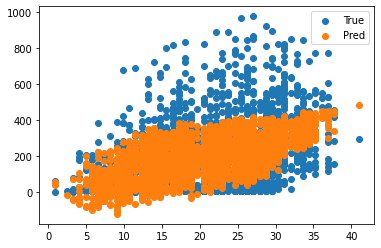

In [ ]:
plt.scatter(list(X_test['temp']), y_test, label="True")
plt.scatter(list(X_test['temp']), predictions, label="Pred")
plt.legend()
plt.show()

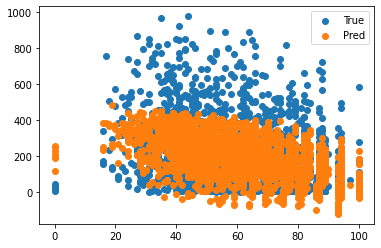

In [ ]:
plt.scatter(list(X_test['humidity']), y_test, label="True")
plt.scatter(list(X_test['humidity']), predictions, label="Pred")
plt.legend()
plt.show()

## 프로젝트 결과 및 토의

이 프로젝트에서 나는 다양한 변수를 가진 데이터를 통해 자전거를 타는 사람들이 몇 명인지 예측하는 모델을 만들었다. 이 과정에서 중요한 것은 두 가지였는데 첫째는 datetime 컬럼을 분해하여 6개로 나눈 것이고, 둘째는 데이터의 여러 컬럼 중에서 feature data로 사용할 컬럼을 미리 분리하는 과정이다.

datetime의 분리는 선형회귀를 하기 위해서 필요한 일이었다. 만약 이것을 적용하지 않고 그냥 숫자로 사용했다면 datetime의 값이 너무 커지게 되므로 이에 대한 가중치가 아주 작아져야할 것이다. 그런데 우리가 날짜를 세는 방식은 10진수가 아니므로 년도, 월, 일, 시간 등등에서 모두가 적절한 가중치를 받기 어려워진다. 따라서 각각의 값에 적합한 가중치가 들어가기 위해서는 따로 분리가 필요했다.

이전까지는 대체로 모든 컬럼이 feature로써 사용되었는데 이번에는 불필요한 컬럼이 존재했다. 물론 그렇다하더라도 학습을 통해 가중치를 바꿔가며 어떤 컬럼이 불필요한지 알아내겠지만 target data인 count컬럼 뿐만 아니라 casual과 registered컬럼도 빼야했다. 사실상 그 둘은 count를 분류한 것이기 때문이다. 만약 데이터의 컬럼들을 파악하지 못 하고 그냥 진행했다면 예측모델이 아니라 단순히 저 두 컬럼을 합하는 모델이 되었을 것이다.

# Reference

https://box-world.tistory.com/70  
https://eehoeskrap.tistory.com/445  
https://blog.naver.com/nsun527/222744958873  



# 회고

오늘은 데이터를 가지고 선형회귀를 통해 예측모델을 만들어보았으며 그 결과를 시각화해보았다. 이 과정을 통해 알 수 있었던 것들이 몇 가지 있다. 첫 번째로 데이터를 파악하는 일이 매우 중요하다는 것이다. 데이터에는 다양한 컬럼들이 있을 수 있으며 그 중에는 그대로 쓰기에는 부적절한 컬럼도 있고, 어떤 컬럼은 불필요할 수도 있으며, 어떤 컬럼은 좋은 모델을 얻기 위해서는 반드시 제외해야만 하는 것들도 있다. 만약 데이터를 확인하지 않고 있는 그대로 사용하게 된다면 우리가 원하는 것과는 전혀 다른 결과를 가져올 수도 있다.

둘째로 하이퍼 파라미터를 바꾸는 일이다. 기계학습에서 가중치 파라미터는 학습을 통해 알아서 좋은 값을 찾아가지만 그럼에도 불구하고 더 나은 모델을 만들기 위해 사람이 직접 값을 기입해야하는 경우가 있다. 이번에 사용한 학습률 같은 것들이 그러하다. 이 때 어떤 데이터를 쓰느냐, 어떤 결과를 원하는가 등에 따라서 적절한 하이퍼 파라미터의 값이 다 다르다. 그러므로 여러 시도를 통해 좋은 값을 찾아야만 한다. 나는 처음에 학습률을 작게 두고 학습횟수를 늘리면 될 것이라고 생각했으나 여기에는 더 많은 시간이 소요된다는 것과 오버피팅의 문제가 존재했다. 데이터가 크고 복잡해질수록 저 두 개의 문제에서 벗어나는 것이 아주 중요해지므로 단순히 시행횟수를 늘리는 것만으로는 부족하다.

만들어진 모델을 평가하기 위해 평가지표들이 존재하며 이번에는 그 중에서 MSE, RMSE 등을 사용했다. 그러나 데이터값에 따라 이 수치들은 상대적이기 때문에 직관적으로 모델을 평가하는데에는 어려움이 있다. 그러나 예측결과를 시각화하여 그래프로 나타낸다면 누구나 해당 모델이 얼마나 예측을 잘 하고 있는지 혹은 못 하고 있는지를 바로 파악할 수 있을 것이다. 모델의 평가를 잘 하는 것은 좋은 모델을 만드는 것만큼이나 중요하므로 시각화로 결과를 표현하는 방법은 꼭 익혀야한다.